# G2M insight for Cab Investment firm

In [49]:
# import all the packages that are required.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from scipy import stats


In [3]:
# reading the csv files

cab_data = pd.read_csv('.\DataSets-main\Cab_Data.csv')
city= pd.read_csv('.\DataSets-main\City.csv')
cust_id = pd.read_csv('.\DataSets-main\Customer_ID.csv')
trans_id= pd.read_csv('.\DataSets-main\Transaction_ID.csv')

# CAB Data

In [21]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [23]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [25]:
# cab dataset shape

print("Number of rows:", cab_data.shape[0])
print("Number of columns:",cab_data.shape[1])

Number of rows: 359392
Number of columns: 7


In [107]:
# Cab data description

cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [117]:
# Now check the type

cab_data.dtypes

Transaction ID             int64
Date of Travel    datetime64[ns]
Company                   object
City                      object
KM Travelled             float64
Price Charged            float64
Cost of Trip             float64
dtype: object

In [27]:
# cab data column names

cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [32]:
# unique values in categorical columns -campany

print(cab_data['Company'].unique())

['Pink Cab' 'Yellow Cab']


In [64]:
# categorical columns -city

print(cab_data['City'].unique())

['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [34]:
# cab data min and max dates

print("Minimum Date: ", cab_data['Date of Travel'].min())
print("Maximum Date: ", cab_data['Date of Travel'].max())

Minimum Date:  42377
Maximum Date:  43465


In [25]:
# Traveling date handling

from datetime import datetime

min_date = cab_data ['Date of Travel'].min()
max_date = cab_data ['Date of Travel'].max()

trans_min = datetime.fromordinal(datetime(1900, 1, 27).toordinal() + min_date- 0 ).strftime("%d-%m-%Y")
trans_max = datetime.fromordinal(datetime(1899, 12, 30).toordinal() + max_date- 0 ).strftime("%d-%m-%Y")

print(trans_min)
print(trans_max)

30-01-2016
31-12-2018


In [26]:
def handle_date(date):
    convert = datetime.fromordinal(datetime(1900, 1, 30).toordinal() + date - 2).strftime("%d-%m-%Y")
    return datetime.strptime(convert, "%d-%m-%Y")

In [29]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [108]:
#checking for missing values

print("\n Missing values in Cab Dataset \n",cab_data.isnull().sum())


 Missing values in Cab Dataset 
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


There is no missing values in cab data

# City Data

In [109]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [110]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [112]:
# Now check the type

city.dtypes

City          object
Population    object
Users         object
dtype: object

In [125]:
# city dataset shape

print("Number of rows:", city.shape[0])
print("Number of columns:",city.shape[1])

Number of rows: 20
Number of columns: 3


In [119]:
city.columns

Index(['City', 'Population', 'Users'], dtype='object')

In [120]:
# checking missing values

print("\n Missing values in City Dataset \n",city.isnull().sum())


 Missing values in City Dataset 
 City          0
Population    0
Users         0
dtype: int64


There is no missing values in city dataset.

In [123]:
# Attribute 'Population' should be an integer

city['Population'] = [x.replace(',','') for x in city['Population']]
city['Population'] = city['Population'].astype(float)

# Attribute 'Users' should be an integer

city['Users'] = [x.replace(',','') for x in city['Users']]
city['Users'] = city['Users'].astype(float)

In [124]:
# City Description

city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [68]:
city['Users'] = city['Users'].replace(",","", regex=True).astype(int)
city['Population'] = city['Population'].replace(",","", regex=True).astype(int)
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


# Customer ID data

In [126]:
cust_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [127]:
cust_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [128]:
 #checking datatype
    
cust_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [129]:
#number of rows and colmns

print("Number of rows:", cust_id.shape[0])
print("Number of columns:",cust_id.shape[1])

Number of rows: 49171
Number of columns: 4


In [134]:
#checking missing values

print("\n Missing values in Transaction Dataset \n",trans_id.isnull().sum())


 Missing values in Transaction Dataset 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There is no missing values in Customer dataset

In [132]:
#column names

cust_id.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [136]:
cust_id['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [137]:
#Customer description

cust_id.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


# Transaction ID Data

In [138]:
trans_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [139]:
trans_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [140]:
#Checking datatype

trans_id.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [141]:
#Number of rows and columns

print("Number of rows:", trans_id.shape[0])
print("Number of columns:",trans_id.shape[1])

Number of rows: 440098
Number of columns: 3


In [142]:
#Column names

trans_id.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

In [144]:
trans_id['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [145]:
#checking missing values

print("\n Missing values in Transaction Dataset \n",trans_id.isnull().sum())


 Missing values in Transaction Dataset 
 Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


There is no missing values in Transaction Id dataset

In [148]:
#transcation descruption

trans_id.describe(include = 'all', datetime_is_numeric=True)

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


# Creating Master Data

We have merged all dataset safely without lossing any data.


In [4]:
# merged all datasets

master_data = cab_data.merge(trans_id, on= 'Transaction ID').merge(
    cust_id, on ='Customer ID').merge(city, on = 'City')

master_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,"418,859","127,001"
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,"418,859","127,001"
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,"418,859","127,001"
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,"418,859","127,001"


In [70]:
# masterdata detailed info

master_data.info

<bound method DataFrame.info of         Transaction ID Date of Travel     Company           City  \
0             10000011     2016-02-06    Pink Cab     ATLANTA GA   
1             10351127     2018-08-19  Yellow Cab     ATLANTA GA   
2             10412921     2018-12-22  Yellow Cab     ATLANTA GA   
3             10000012     2016-02-04    Pink Cab     ATLANTA GA   
4             10320494     2018-05-20  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-04-01  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-05-12  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-08-04  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-31  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-09-28  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              30.45         370.95      313.6350        29290         C

In [71]:
# checking no of missing values in each column

master_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

As a conclusion here is no missing values after merging all datasets.

In [46]:
#number of rows and columns in master dataset

master_data.shape

(359392, 14)

In [48]:
#checking unique values of Company

print(master_data.Company.unique())
print(master_data.Company.value_counts())

['Pink Cab' 'Yellow Cab']
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


In [42]:
import xlrd
master_data['Year']=pd.DatetimeIndex(master_data['Date_of_Travel']).year
master_data['Month']=pd.DatetimeIndex(master_data['Date_of_Travel']).month


# Check the correlation

In [9]:
import warnings
warnings.filterwarnings("ignore")

data_corr = master_data.corr()
data_corr

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,-0.017653,-0.001346,-0.001368
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


<Axes: title={'center': 'Correlation Heatmap of "G2M Insight for Cab Investment"'}>

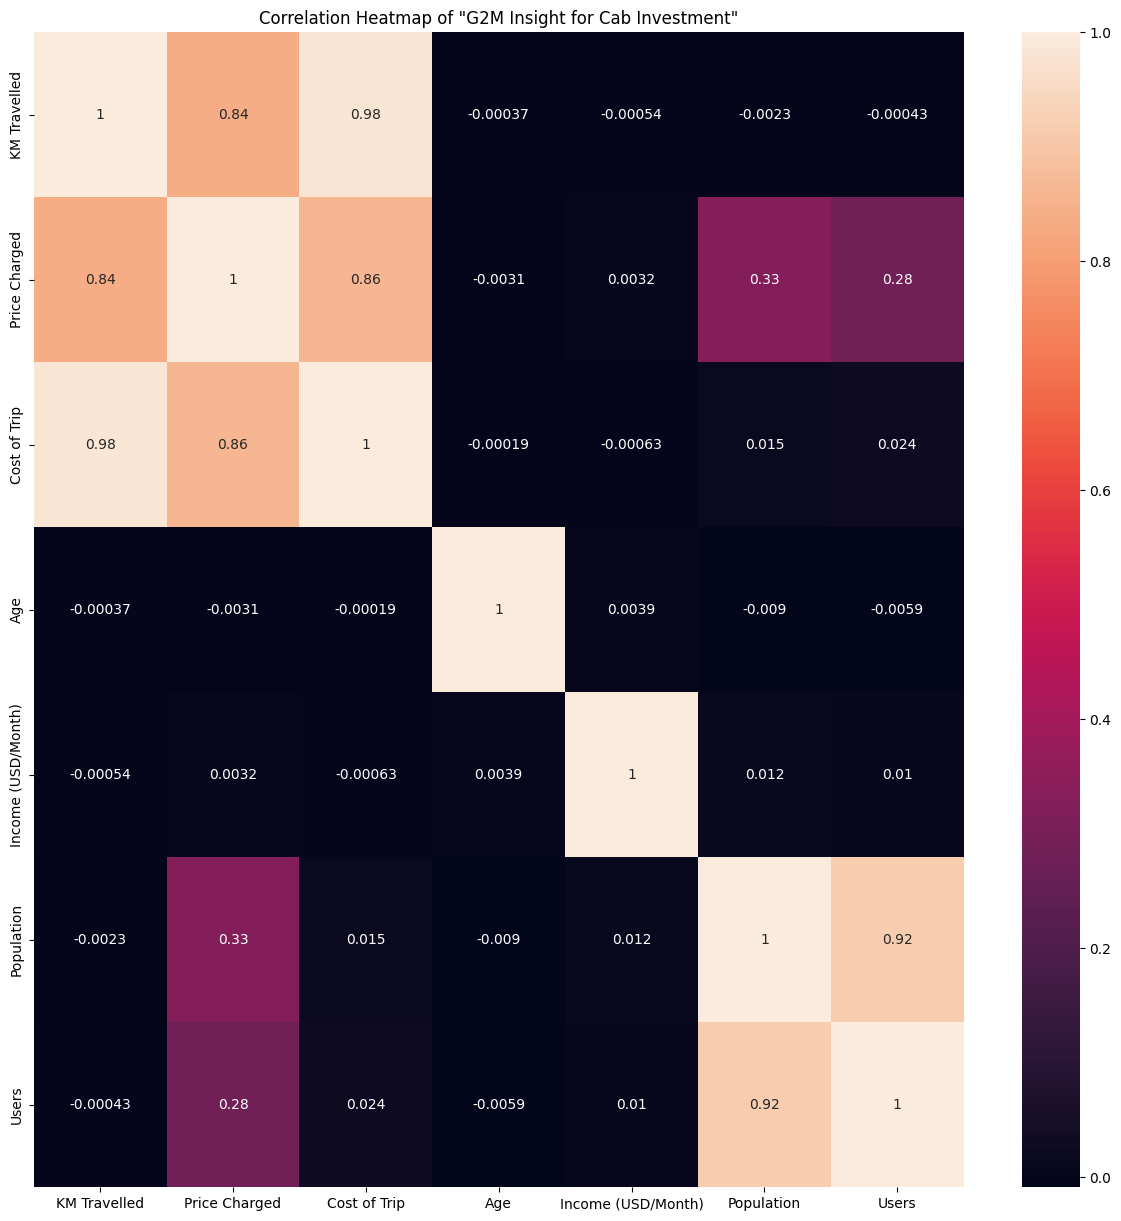

In [94]:
#correlation matrix

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment"')
sb.heatmap(master_data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']].corr(), color='r', annot=True)

From above map there is a correlation between:

* KM travelled is highly correlated with Price Changed and Cost of Trip.

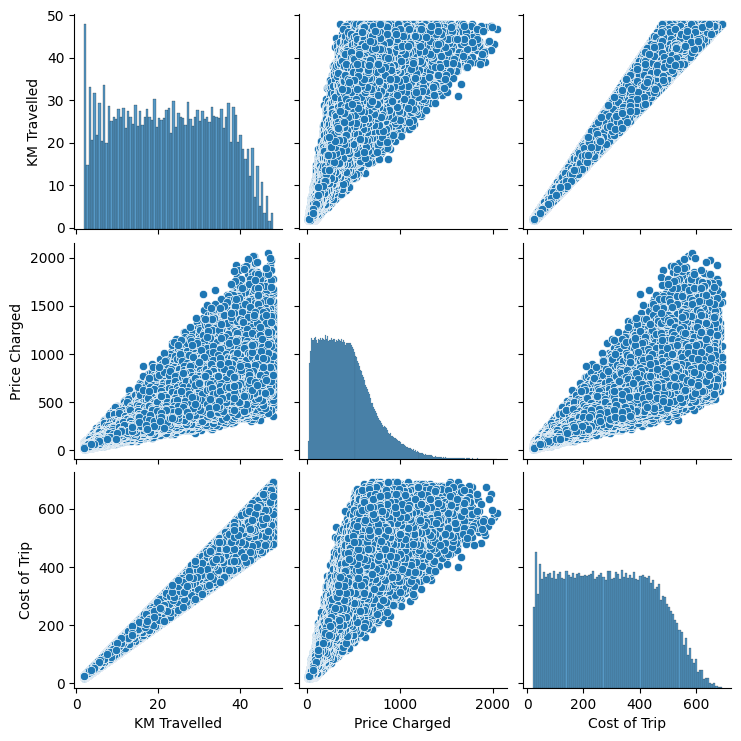

In [81]:
sb.pairplot(data=master_data[['KM Travelled', 'Price Charged', 'Cost of Trip']])
plt.show()

* Users are related to population 

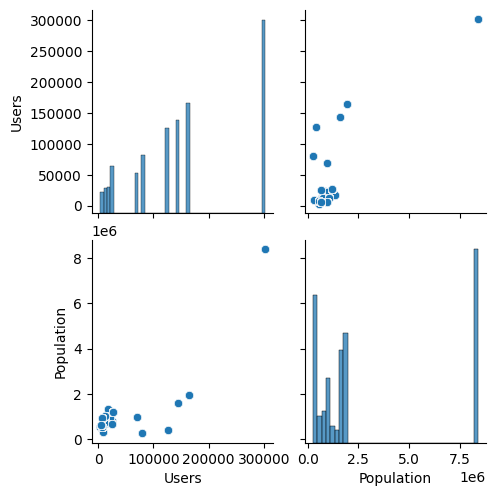

In [82]:
sb.pairplot(data=master_data[['Users','Population']])
plt.show()

# FEATURE ANALYSIS

## 1.Number of  users 

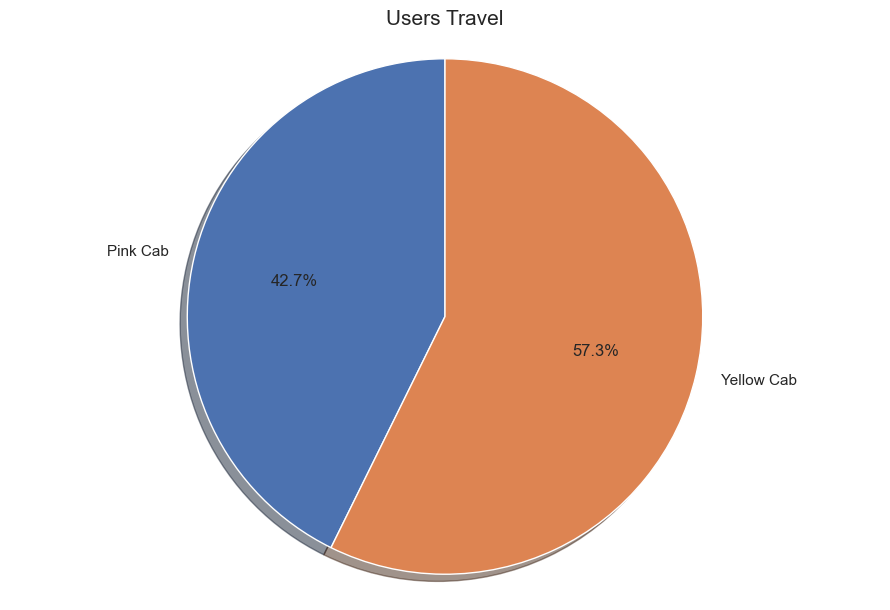

In [147]:
#plotting number of users of pink and yellow company 

user=master_data.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

**CONCLUSION**: Number of yellow cab users(57%) are more than pink cab(42%)

## 2. Profit Margin

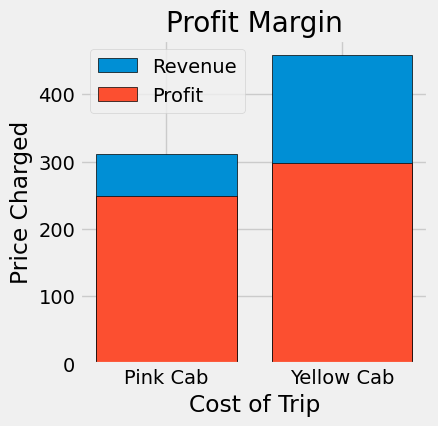

In [124]:
company = master_data.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

plt.style.use('fivethirtyeight')
plt.figure(figsize = (4, 4))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

**CONCLUSION:** In contrast to the Pink cab, the Yellow cab has a higher profit margin

In [27]:
# calculating the profit of each transaction

master_data['Profit'] = master_data['Price Charged'] -master_data['Cost of Trip']


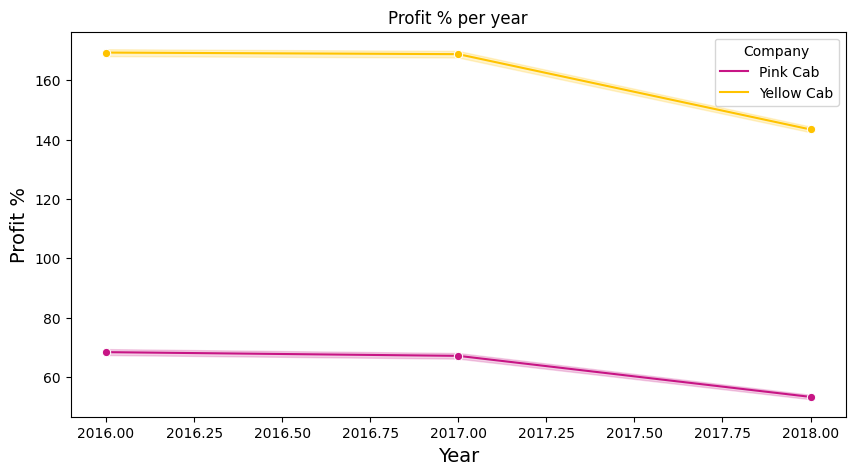

In [40]:
#profit per year

plt.figure(figsize = (10, 5))
sb.lineplot(x='Year', y='Profit', hue="Company", data=master_data, marker='o',palette=['#C71585', '#FFC300'])
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

**CONCLUSION:** From the line graph we can conclude
* In comparison to 2018, both companies' profits were higher in 2016.
* In the year 2018, PINK cab had higher profits than YELLOW cab.
* From 2016 to 2017, the profit margin stayed consistent and it was dropped after 2017.

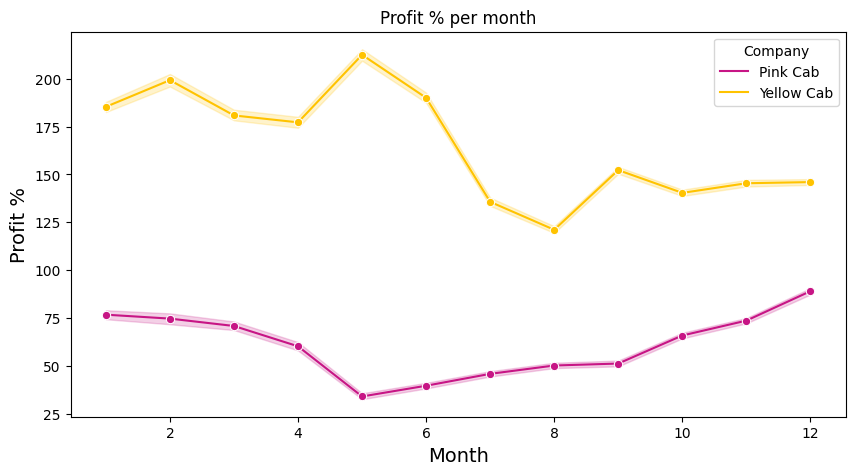

In [24]:
#profit per month

plt.figure(figsize = (10, 5))
sb.lineplot(x='Travel_month', y='Profit', hue="Company", data=master_data, marker='o', palette=['#C71585', '#FFC300'])
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per month")
plt.show()

**CONCLUSION:** From the line graph we can conclude
* The middle of the year appears to have been profitable for YELLOW cab.
* PINK Cab has made more profit at the beginning and end of the year.
* In pink cab,profit was going up and down consistently while in yellow cab it was declined over the months and later it went up.

## 3.KM Travelled Distribution

Text(0, 0.5, 'Frequency')

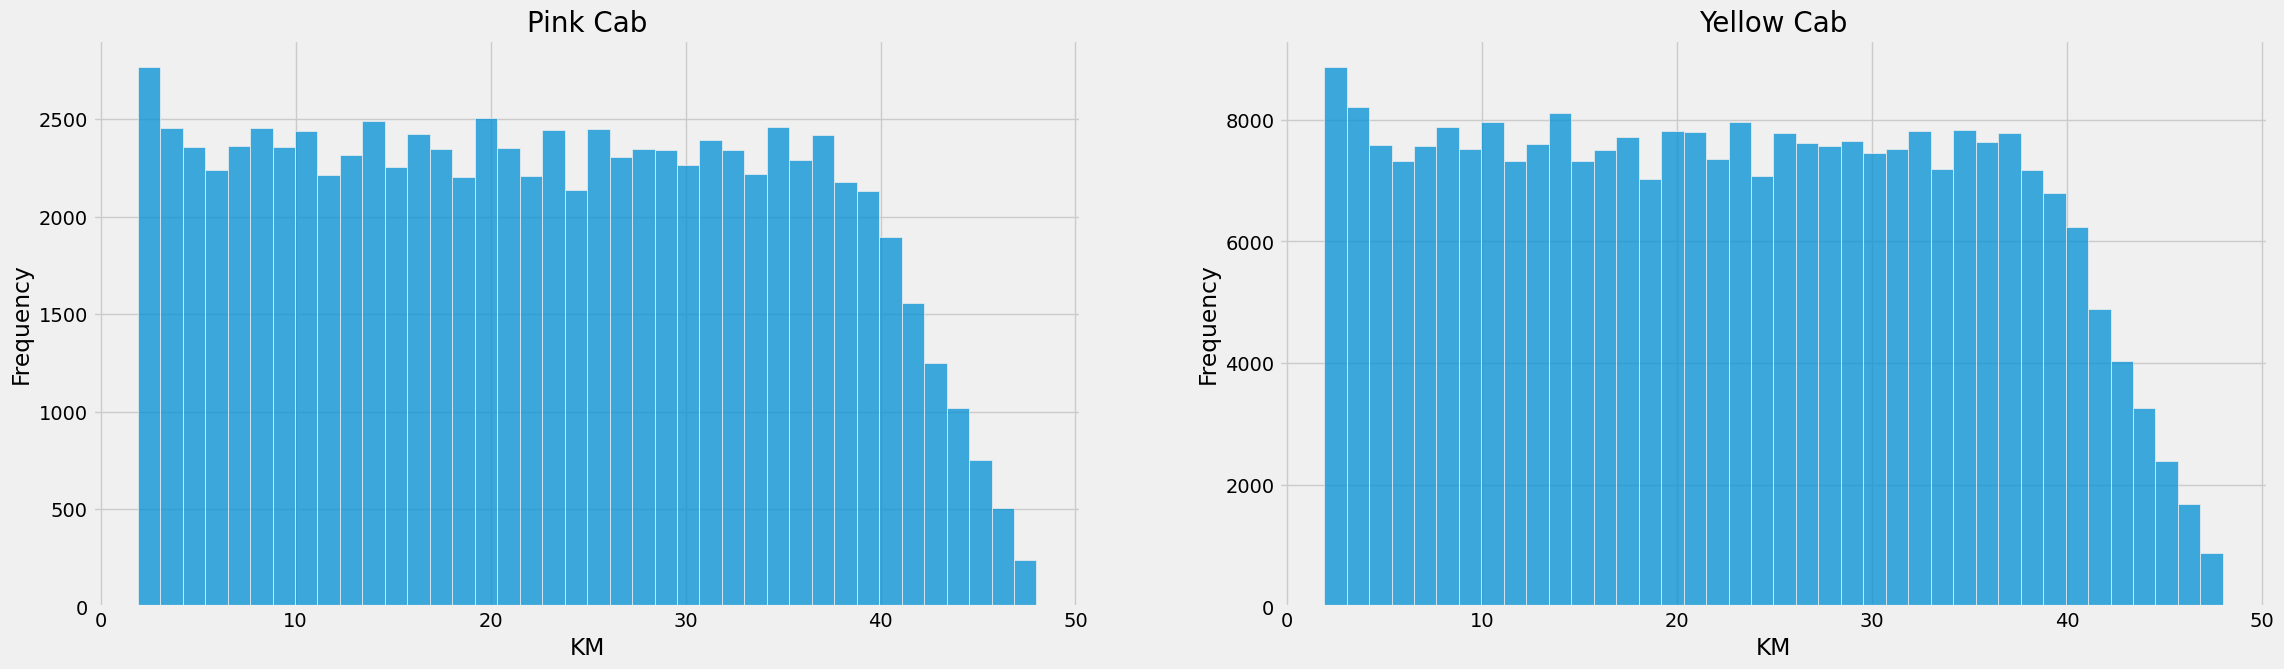

In [126]:
#number of KM travelled in both cabs

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,7))
sb.histplot(data=PinkCab, x='KM Travelled', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('KM')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='KM Travelled', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('KM')
ax2.set_ylabel('Frequency')

**CONCLUSION:** Most of the rides are in the range of approximately 2 to 48 KM.  

## 4.Mode of Payment

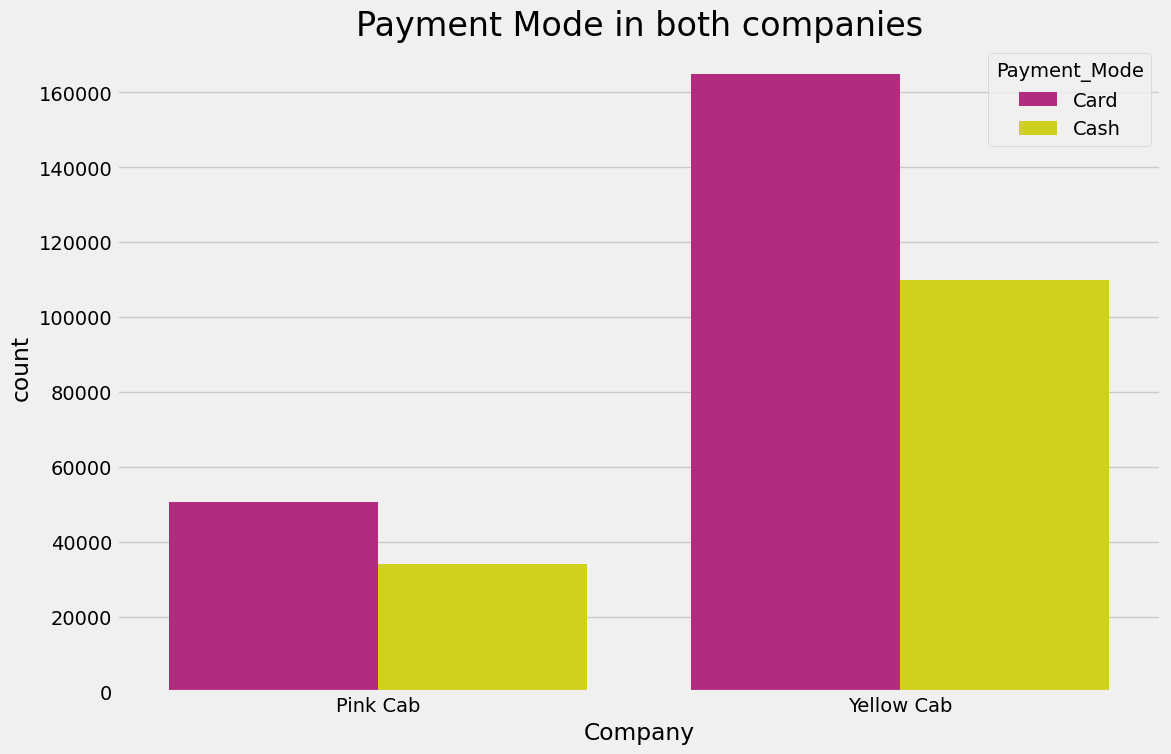

In [143]:
plt.figure(figsize = (12, 8))
ax = sb.countplot(x="Company", hue="Payment_Mode", data=master_data,palette=['#C71585', '#EEEE00'])
plt.title('Payment Mode in both companies', fontsize=24)
plt.show()

**CONCLUSION:** Users prefered to pay with a card more than cash.

## 5. Price charged

Text(0, 0.5, 'Frequency')

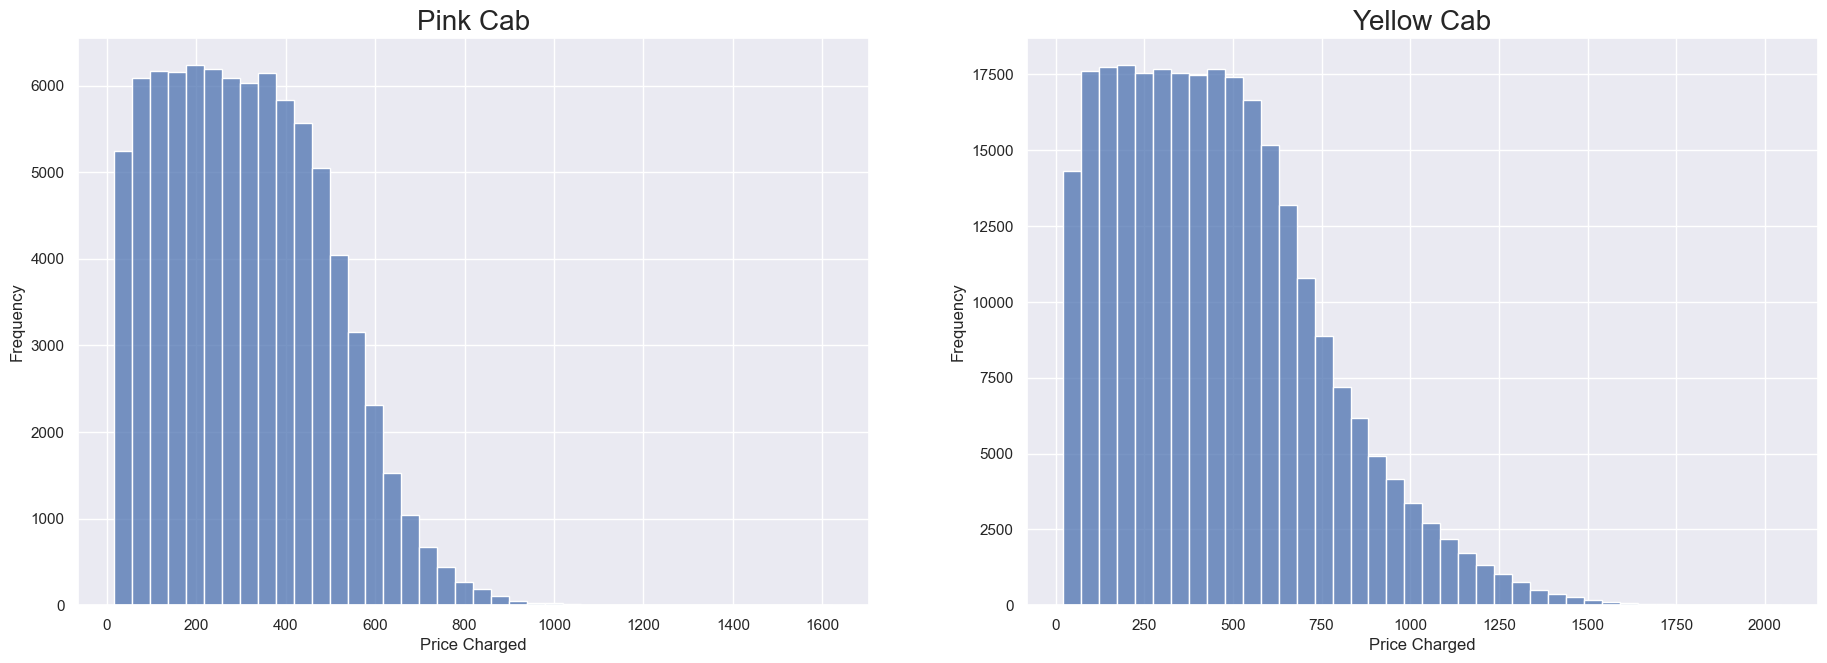

In [170]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sb.histplot(data=PinkCab, x='Price Charged', bins=40, ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlabel('Price Charged')
ax1.set_ylabel('Frequency')
sb.histplot(data=YellowCab, x='Price Charged', bins=40, ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
ax2.set_xlabel('Price Charged')
ax2.set_ylabel('Frequency')

**CONCLUSION:** Price charged per trip is more for YELLOW cab compared to PINK cab



## 6. Gender Count

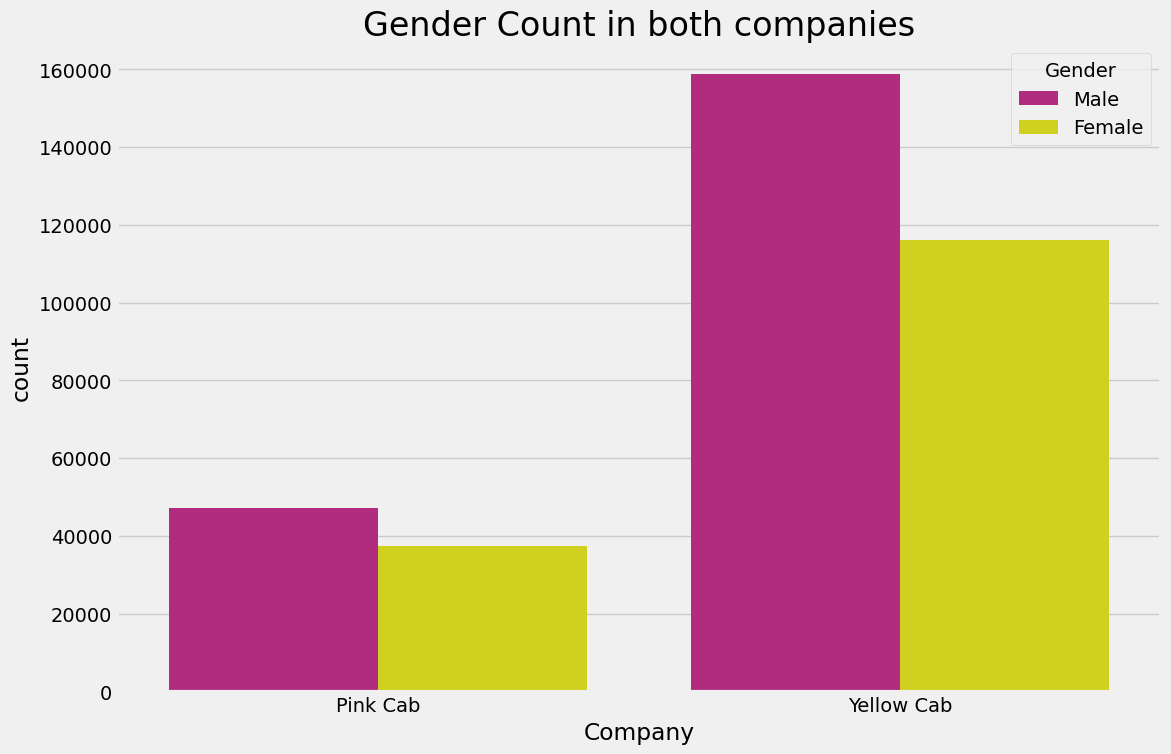

In [141]:
# comparing male and female travel frequency

plt.figure(figsize = (12, 8))
ax = sb.countplot(x="Company", hue="Gender", data=master_data, palette=['#C71585', '#EEEE00'])
plt.title('Gender Count in both companies', fontsize=24)
plt.show()

**CONCLUSION:** 
* In  both companies, males have travelled more compared to females.
* Yellow cabs are preferred by customers.

## 7.User per city

<Axes: title={'center': ' USER PRESENCE CITY WISE'}, ylabel='Users'>

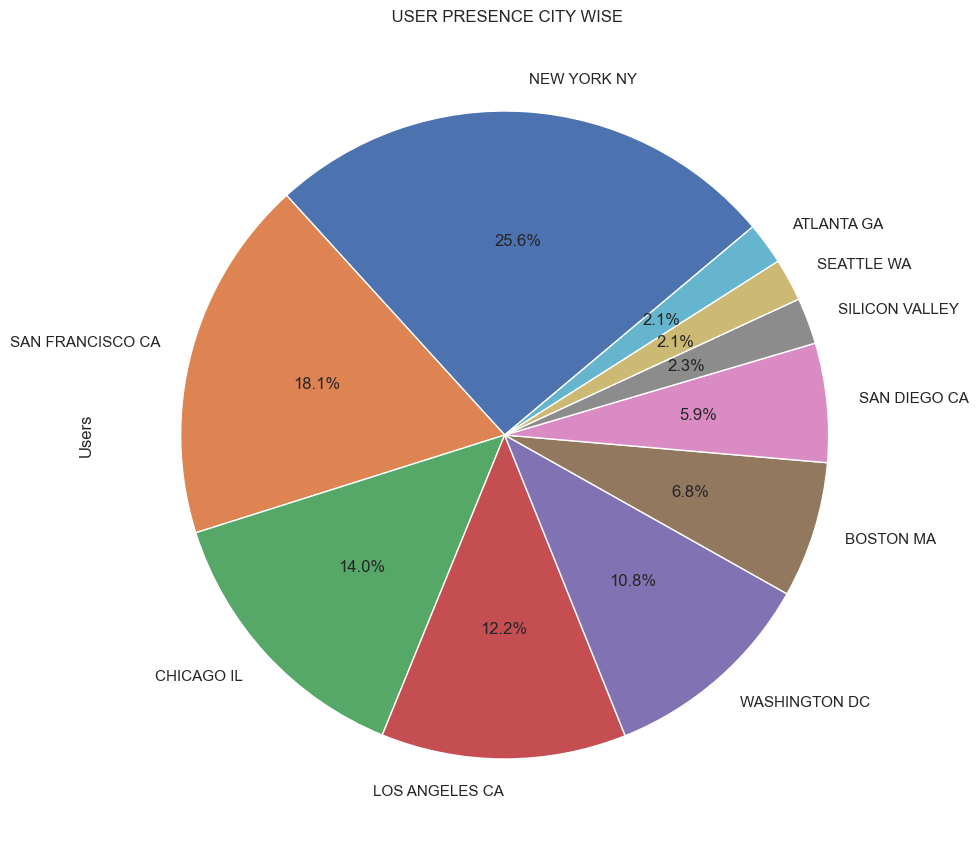

In [157]:

# top 10 cities by users
plt.title(" USER PRESENCE CITY WISE")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

**CONCLUSION:** The majority of cab users are in New York City (25%), followed by San Francisco (18%), and Chicago (14%).

## 8.Checking Outliers of column values

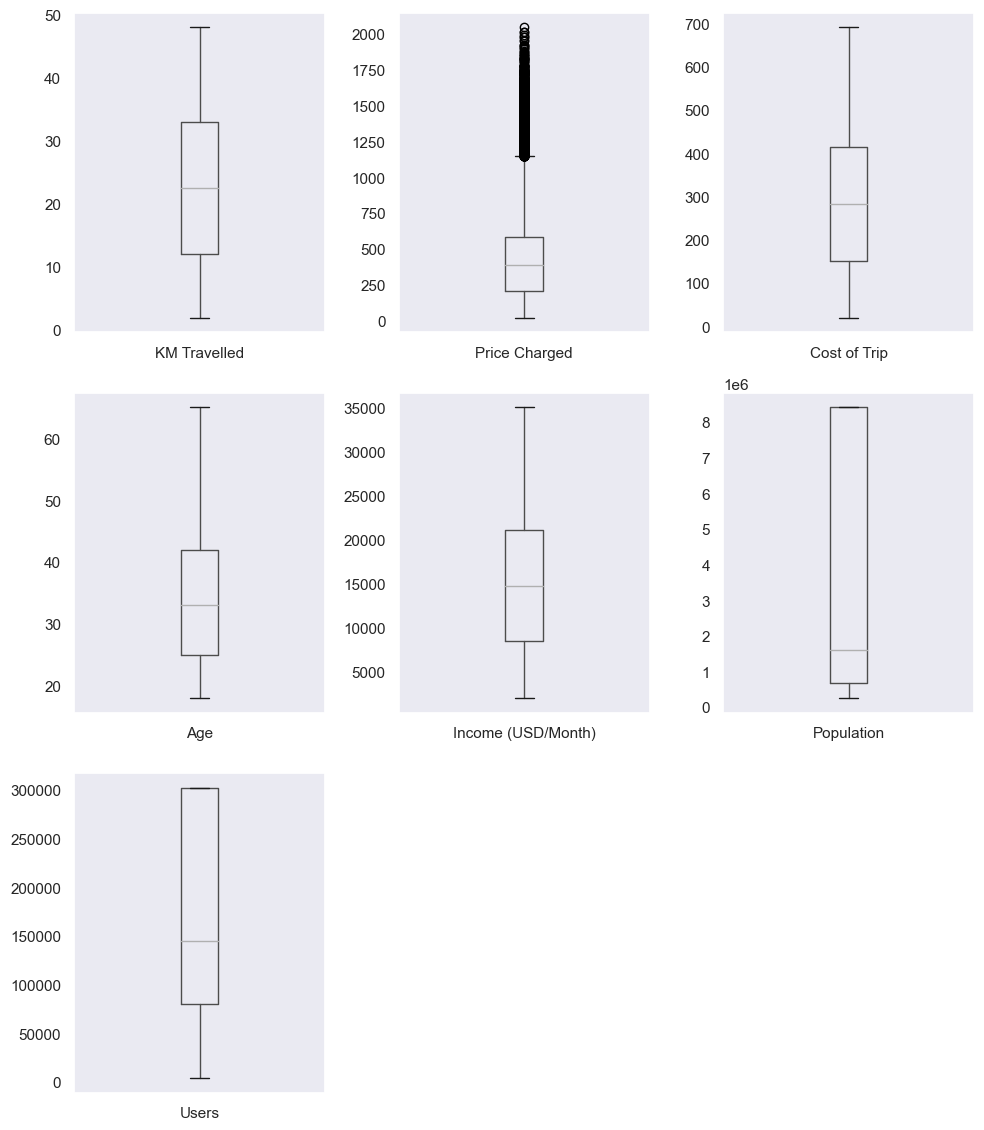

In [173]:
# To check the outliers we use boxplots.

master_data.columns.values
cols = ['KM Travelled', 'Price Charged', 'Cost of Trip',
        'Age', 'Income (USD/Month)',
       'Population', 'Users']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    master_data.boxplot(col)
    plt.grid()
    plt.tight_layout()

**CONCLUSION:** From above boxplot price charged has some outliers while compared with other values

## 9. Price charged with respect to Distance 

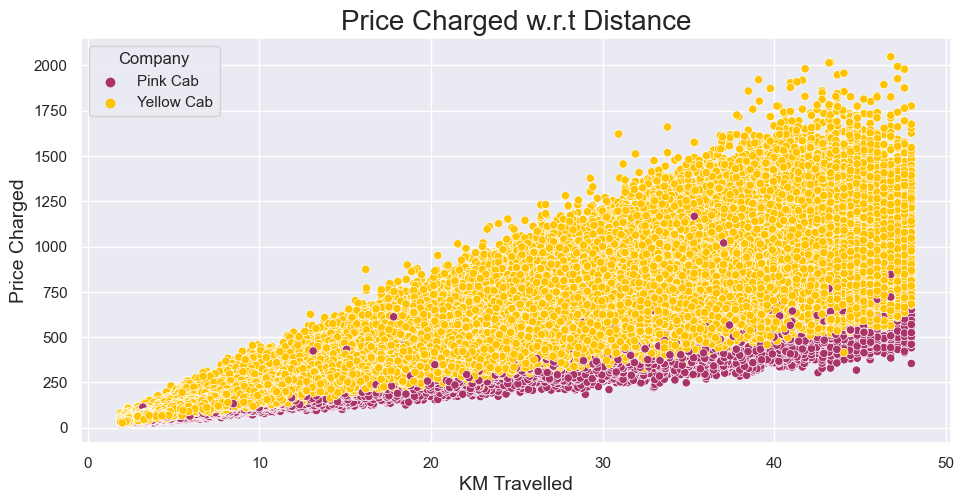

In [176]:
plt.figure(figsize = (10, 5))

sb.scatterplot(data=master_data, x='KM Travelled', y='Price Charged', hue='Company', palette=['#AA336A', '#FFC300'])
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

**CONCLUSION:** The scatter plot above demonstrates a linear relationship between the price charged and the distance travelled for both cab campanies.

# Hypothesis

###  Hypothesis 1 : Is there any gender-based difference in profit?

*H0(Null Hypothesis):There is no difference based on gender in both cab companies.*

*H1(Alternate Hypothesis):There is difference based on gender in both cab companies.*

**Pink Cab**

In [56]:
a = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values, b.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference based on gender for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference based on gender for Pink Cab')

47231 37480
P value is  0.115153059004258
We accept null hypothesis (H0) that there is no difference based on gender for Pink Cab


**Yellow Cab**

In [58]:
a = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values, b.values, equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference based on gender for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference based on gender for Yellow Cab')

158681 116000
P value is  6.060473042494056e-25
We accept alternative hypothesis (H1) that there is a difference based on gender for Yellow Cab


*As a conclusion there is no difference regarding Gender in both cab companies.*

### Hypothesis 2 : Is there any difference in Profit regarding Age.

*H0(Null Hypothesis):There is no difference regarding Age in both cab companies.*

*H1(Alternate Hypothesis):There is difference regarding Age in both cab companies.*

**Pink Cab**

In [54]:
a = master_data[(master_data.Age <= 60)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Age >= 60)&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

80125 5429
P value is  0.4816748536155634
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


**Yellow Cab**

In [59]:
a = master_data[(master_data.Age <= 60)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = master_data[(master_data.Age >= 60)&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

260356 17257
P value is  6.328485471267631e-05
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


## Summary

I found that there are no null values in the master dataframe.
The above Exploratory Data Analysis finds various dynamics of the data of two cab companies,that is Pink Cab and Yellow Cab. 
* **Yellow Cab is noticeably earning much Profit than Pink Cab.**
* **Yellow cab is preferred by the customers over Pink cab.**
* **Yellow Cab is more popular than Pink Cab overall.**

To sum up, Yellow cab would be the preferred one to invest in.